<a href="https://colab.research.google.com/github/himanshu230998/Lab-1-Optimizer-CNN-and-Gradcam-/blob/main/LAB_1_2017meb1212(Himanshu_Kumar_Singh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q-1 Study and implement: On a two dimensional fuction like  f(w1,w2)=a1(w1−b1)2+a2(w2−b2)2+c  where  a1,a2,b1,b2  and  c  are hyperparameters which affect the rate of convergence of these algorithms.

In [ ]:
#imports
import math
import tensorflow as tf
import numpy as np
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Input Variable
a1=float(input("Enter a1: "))
b1=float(input("Enter b1: "))
a2=float(input("Enter a2: "))
b2=float(input("Enter b2: "))
c=float(input("Enter c: "))

#Defination of Function used in question 1
def fu(w1, w2): 
  return a1*(w1-b1)**2.0+a2*(w2-b2)**2+c
def fu_minimzie():
  return a1*(w1-b1)**2.0+a2*(w2-b2)**2+c

#Defination of Function used in question 2
def fu2(w1, w2): 
    return w1**2-w2**2+w2**4
def fu2_minimzie():
    return w1**2-w2**2+w2**4

#Initial values of parameter w1 and w2 for question 1 and 2
def reset():
  w11=float(input("Enter initial w1: "))
  w22=float(input("Enter initial w2: "))
  w1=tf.Variable(w11)                       #I wanted to type cast to tf.variable. 
  w2=tf.Variable(w22)
  return w1, w2

######################     Optimizers           #################

#Stochastic gradient descent
def sgd(fu,fu_minimzie,learning_rate=0.1):
  iter_x, iter_y, iter_count =np.empty(0),np.empty(0), np.empty(0)
  opt = tf.keras.optimizers.SGD(learning_rate=0.1)
  for i in range(100):
    print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f}'.format(fu(w1, w2).numpy(), w1.numpy(), w2.numpy()))
    opt.minimize(fu_minimzie, var_list=[w1, w2])
    iter_x = np.append(iter_x,w1.numpy())
    iter_y = np.append(iter_y,w2.numpy())
    iter_count = np.append(iter_count ,i)
  return iter_x, iter_y,iter_count

#RMSProp
def RMSprop(fu,fu_minimzie,learning_rate=0.1):
  iter_x, iter_y, iter_count =np.empty(0),np.empty(0), np.empty(0)
  opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
  for i in range(100):
    print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f}'.format(fu(w1, w2).numpy(), w1.numpy(), w2.numpy()))
    opt.minimize(fu_minimzie, var_list=[w1, w2])
    iter_x = np.append(iter_x,w1.numpy())
    iter_y = np.append(iter_y,w2.numpy())
    iter_count = np.append(iter_count ,i)
  return iter_x, iter_y,iter_count

#Nesterov Accelerated Gradient
def NAG(fu,fu_minimzie,learning_rate=0.1,momentum=0.1):
  iter_x, iter_y, iter_count =np.empty(0),np.empty(0), np.empty(0)
  opt = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.1, nesterov=True)
  for i in range(100):
    print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f}'.format(fu(w1, w2).numpy(), w1.numpy(), w2.numpy()))
    opt.minimize(fu_minimzie, var_list=[w1, w2])
    iter_x = np.append(iter_x,w1.numpy())
    iter_y = np.append(iter_y,w2.numpy())
    iter_count = np.append(iter_count ,i)
  return iter_x, iter_y,iter_count

#ADAM
def ADAM(fu,fu_minimzie,learning_rate=0.1):
  iter_x, iter_y, iter_count =np.empty(0),np.empty(0), np.empty(0)
  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  for i in range(100):
    print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f}'.format(fu(w1, w2).numpy(), w1.numpy(), w2.numpy()))
    opt.minimize(fu_minimzie, var_list=[w1, w2])
    iter_x = np.append(iter_x,w1.numpy())
    iter_y = np.append(iter_y,w2.numpy())
    iter_count = np.append(iter_count ,i)  
  return iter_x, iter_y,iter_count

######                     Mesh and Contour plot              #######
def mesh(fun,iter_x,iter_y,iter_count,w1,w2):
  w1 = np.linspace(w1-10,w1+10,250)
  w2= np.linspace(w2-10,w2+10,250)
  X, Y = np.meshgrid(w1, w2)
  Z = fun(X, Y)

  #Angles needed for quiver plot
  anglesx = iter_x[1:] - iter_x[:-1]
  anglesy = iter_y[1:] - iter_y[:-1]
  %matplotlib inline
  fig = plt.figure(figsize = (16,8))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = 0.6, edgecolor = 'none' )
  ax.plot(iter_x,iter_y, fun(iter_x,iter_y),color = 'r', marker = '*', alpha = 0.6)
  ax.view_init(45, 280)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('mesh plot with {} iterations'.format(len(iter_count)))
  plt.show()

def contour(fun,iter_x,iter_y,iter_count,w1,w2):
  w1 = np.linspace(w1-10,w1+10,250)
  w2= np.linspace(w2-10,w2+10,250)
  X, Y = np.meshgrid(w1, w2)
  Z = fun(X, Y)

  #Angles needed for quiver plot
  anglesx = iter_x[1:] - iter_x[:-1]
  anglesy = iter_y[1:] - iter_y[:-1]

  %matplotlib inline
  fig = plt.figure(figsize = (16,8))  
  ax = fig.add_subplot(1, 2, 2)
  ax.contour(X,Y,Z, 50, cmap = 'jet')
  #Plotting the iterations and intermediate values
  ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
  ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
  ax.set_title('contour plot with {} iterations'.format(len(iter_count)))
  plt.show()

Enter a1: 1
Enter b1: 1
Enter a2: 1
Enter b2: 1
Enter c: 1


 a. Stochastic gradient descent 

Enter initial w1: 10
Enter initial w2: 10
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 163.0, w1 = 10.0, w2 = 10.0
y = 104.7, w1 = 8.2, w2 = 8.2
y = 67.4, w1 = 6.8, w2 = 6.8
y = 43.5, w1 = 5.6, w2 = 5.6
y = 28.2, w1 = 4.7, w2 = 4.7
y = 18.4, w1 = 3.9, w2 = 3.9
y = 12.1, w1 = 3.4, w2 = 3.4
y = 8.1, w1 = 2.9, w2 = 2.9
y = 5.6, w1 = 2.5, w2 = 2.5
y = 3.9, w1 = 2.2, w2 = 2.2
y = 2.9, w1 = 2.0, w2 = 2.0
y = 2.2, w1 = 1.8, w2 = 1.8
y = 1.8, w1 = 1.6, w2 = 1.6
y = 1.5, w1 = 1.5, w2 = 1.5
y = 1.3, w1 = 1.4, w2 = 1.4
y = 1.2, w1 = 1.3, w2 = 1.3
y = 1.1, w1 = 1.3, w2 = 1.3
y = 1.1, w1 = 1.2, w2 = 1.2
y = 1.1, w1 = 1.2, w2 = 1.2
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y =

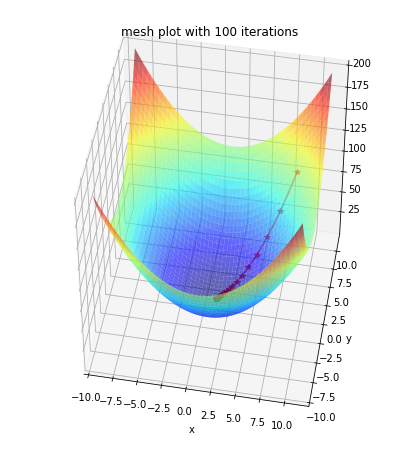

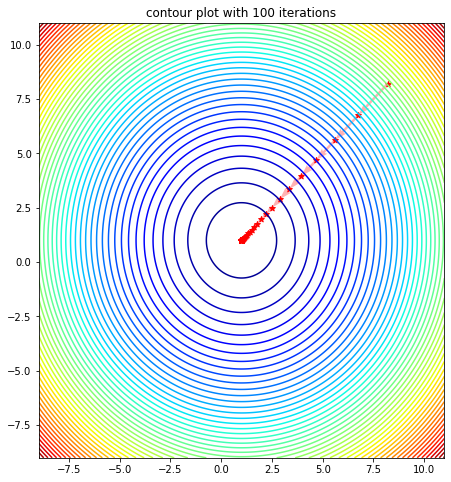

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=sgd(fu,fu_minimzie,learning_rate)
mesh(fu,iter_x,iter_y,iter_count, w1, w2)
contour(fu,iter_x,iter_y,iter_count,w1,w2)

b. RMSProp

Enter initial w1: 10
Enter initial w2: 10
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 163.0, w1 = 10.0, w2 = 10.0
y = 151.8, w1 = 9.7, w2 = 9.7
y = 144.1, w1 = 9.5, w2 = 9.5
y = 137.8, w1 = 9.3, w2 = 9.3
y = 132.4, w1 = 9.1, w2 = 9.1
y = 127.6, w1 = 9.0, w2 = 9.0
y = 123.3, w1 = 8.8, w2 = 8.8
y = 119.2, w1 = 8.7, w2 = 8.7
y = 115.4, w1 = 8.6, w2 = 8.6
y = 111.8, w1 = 8.4, w2 = 8.4
y = 108.4, w1 = 8.3, w2 = 8.3
y = 105.1, w1 = 8.2, w2 = 8.2
y = 102.0, w1 = 8.1, w2 = 8.1
y = 99.0, w1 = 8.0, w2 = 8.0
y = 96.1, w1 = 7.9, w2 = 7.9
y = 93.2, w1 = 7.8, w2 = 7.8
y = 90.5, w1 = 7.7, w2 = 7.7
y = 87.9, w1 = 7.6, w2 = 7.6
y = 85.3, w1 = 7.5, w2 = 7.5
y = 82.8, w1 = 7.4, w2 = 7.4
y = 80.4, w1 = 7.3, w2 = 7.3
y = 78.0, w1 = 7.2, w2 = 7.2
y = 75.7, w1 = 7.1, w2 = 7.1
y = 73.4, w1 = 7.0, w2 = 7.0
y = 71.2, w1 = 6.9, w2 = 6.9
y = 69.0, w1 = 6.8, w2 = 6.8
y = 66.9, w1 = 6.7, w2 = 6.7
y = 64.8, w1 = 6.6, w2 = 6.6
y = 62.8, w1 = 6.6, w2 = 6.6
y = 60.8, w1 = 6.5, w2 = 6.5
y = 58.9, w1 = 6.4, w2 = 

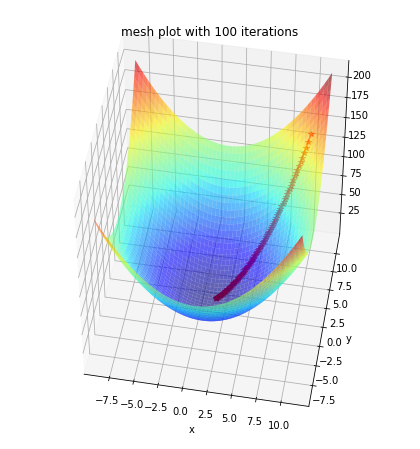

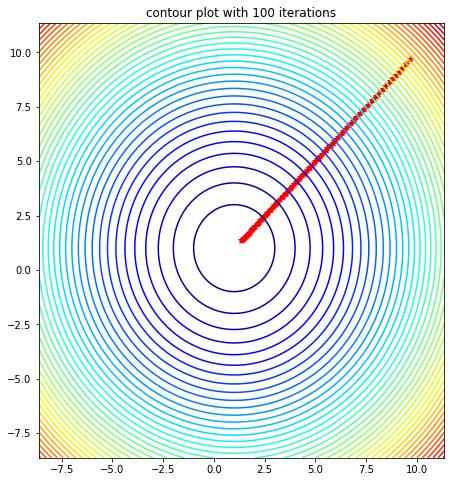

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=RMSprop(fu,fu_minimzie,learning_rate)
mesh(fu,iter_x,iter_y,iter_count, w1, w2)
contour(fu,iter_x,iter_y,iter_count,w1,w2)

c. Nesterov Accelerated Gradient

Enter initial w1: 10
Enter initial w2: 10
Enter learning_rate(between 0.1 to 0.001): 0.01
Enter momentum(between 0.1 to 0.001): 0.01
y = 163.0, w1 = 10.0, w2 = 10.0
y = 99.6, w1 = 8.0, w2 = 8.0
y = 60.6, w1 = 6.5, w2 = 6.5
y = 37.0, w1 = 5.2, w2 = 5.2
y = 22.7, w1 = 4.3, w2 = 4.3
y = 14.1, w1 = 3.6, w2 = 3.6
y = 8.9, w1 = 3.0, w2 = 3.0
y = 5.8, w1 = 2.5, w2 = 2.5
y = 3.9, w1 = 2.2, w2 = 2.2
y = 2.7, w1 = 1.9, w2 = 1.9
y = 2.1, w1 = 1.7, w2 = 1.7
y = 1.6, w1 = 1.6, w2 = 1.6
y = 1.4, w1 = 1.4, w2 = 1.4
y = 1.2, w1 = 1.3, w2 = 1.3
y = 1.1, w1 = 1.3, w2 = 1.3
y = 1.1, w1 = 1.2, w2 = 1.2
y = 1.1, w1 = 1.2, w2 = 1.2
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.1, w2 = 1.1
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0, w2 = 1.0
y = 1.0, w1 = 1.0,

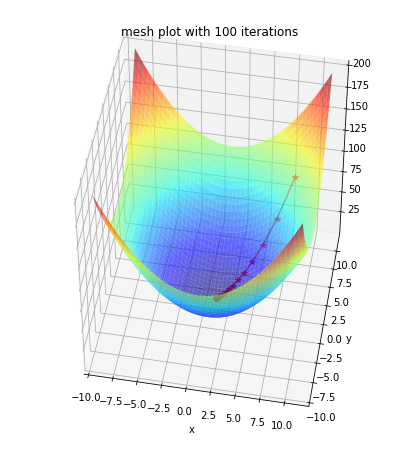

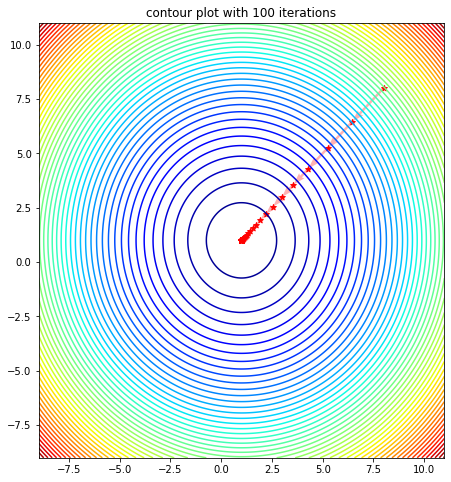

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
momentum=float(input(("Enter momentum(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=NAG(fu,fu_minimzie,learning_rate,momentum)
mesh(fu,iter_x,iter_y,iter_count, w1, w2)
contour(fu,iter_x,iter_y,iter_count,w1,w2)

d. ADAM

Enter initial w1: 10
Enter initial w2: 10
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 163.0, w1 = 10.0, w2 = 10.0
y = 159.4, w1 = 9.9, w2 = 9.9
y = 155.9, w1 = 9.8, w2 = 9.8
y = 152.4, w1 = 9.7, w2 = 9.7
y = 148.9, w1 = 9.6, w2 = 9.6
y = 145.5, w1 = 9.5, w2 = 9.5
y = 142.1, w1 = 9.4, w2 = 9.4
y = 138.8, w1 = 9.3, w2 = 9.3
y = 135.5, w1 = 9.2, w2 = 9.2
y = 132.3, w1 = 9.1, w2 = 9.1
y = 129.1, w1 = 9.0, w2 = 9.0
y = 126.0, w1 = 8.9, w2 = 8.9
y = 122.9, w1 = 8.8, w2 = 8.8
y = 119.8, w1 = 8.7, w2 = 8.7
y = 116.8, w1 = 8.6, w2 = 8.6
y = 113.9, w1 = 8.5, w2 = 8.5
y = 111.0, w1 = 8.4, w2 = 8.4
y = 108.1, w1 = 8.3, w2 = 8.3
y = 105.3, w1 = 8.2, w2 = 8.2
y = 102.6, w1 = 8.1, w2 = 8.1
y = 99.8, w1 = 8.0, w2 = 8.0
y = 97.2, w1 = 7.9, w2 = 7.9
y = 94.6, w1 = 7.8, w2 = 7.8
y = 92.0, w1 = 7.7, w2 = 7.7
y = 89.5, w1 = 7.7, w2 = 7.7
y = 87.0, w1 = 7.6, w2 = 7.6
y = 84.6, w1 = 7.5, w2 = 7.5
y = 82.2, w1 = 7.4, w2 = 7.4
y = 79.9, w1 = 7.3, w2 = 7.3
y = 77.6, w1 = 7.2, w2 = 7.2
y = 75.4, w1 = 7.1

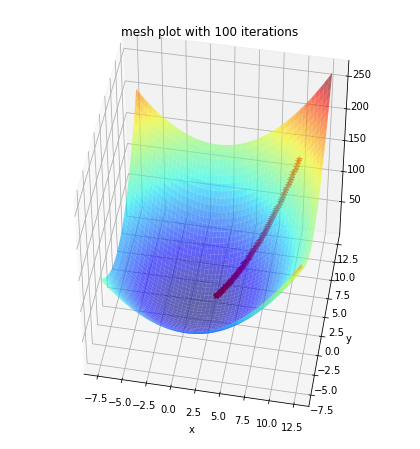

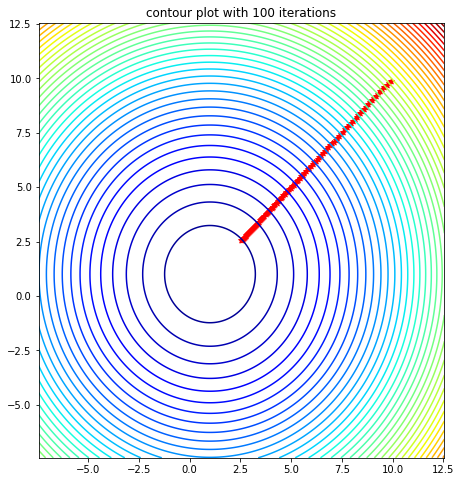

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=ADAM(fu,fu_minimzie,learning_rate)
mesh(fu,iter_x,iter_y,iter_count, w1, w2)
contour(fu,iter_x,iter_y,iter_count,w1,w2)

2. Experiment these optimization techniques on the non-convex function(s) (functions having saddle points and local minima's) to illustrate the effectiveness of each of these techniques

Answer: Given non-convex function has two minima at x=0, y=-0.707 and x=0,y=0.707 and saddle point at x=0,y=0


> 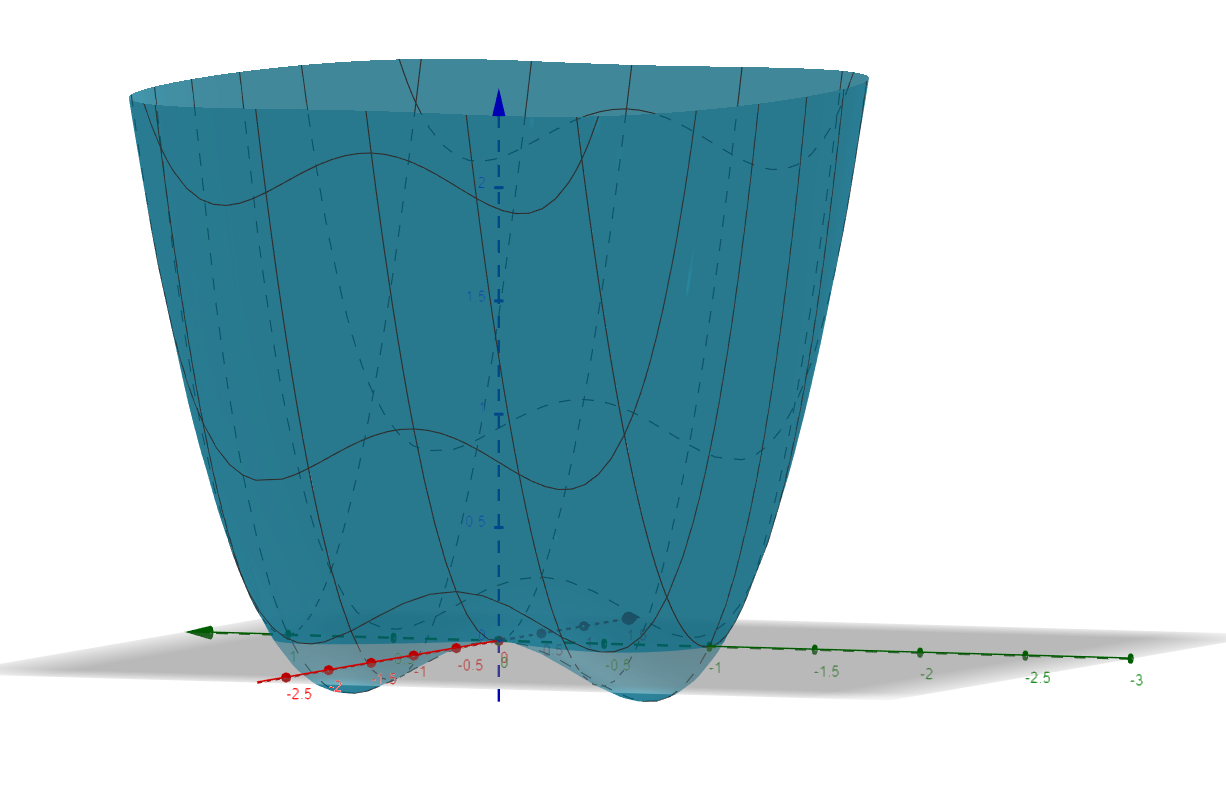



Enter initial w1: 2
Enter initial w2: 2
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 16.0, w1 = 2.0, w2 = 2.0
y = 2.3, w1 = 1.6, w2 = -0.8
y = 1.4, w1 = 1.3, w2 = -0.8
y = 0.8, w1 = 1.0, w2 = -0.7
y = 0.4, w1 = 0.8, w2 = -0.7
y = 0.2, w1 = 0.7, w2 = -0.7
y = 0.0, w1 = 0.5, w2 = -0.7
y = -0.1, w1 = 0.4, w2 = -0.7
y = -0.1, w1 = 0.3, w2 = -0.7
y = -0.2, w1 = 0.3, w2 = -0.7
y = -0.2, w1 = 0.2, w2 = -0.7
y = -0.2, w1 = 0.2, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0,

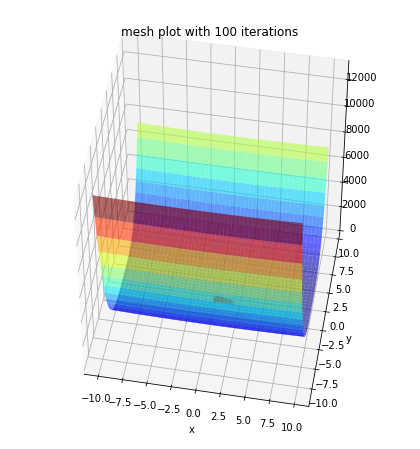

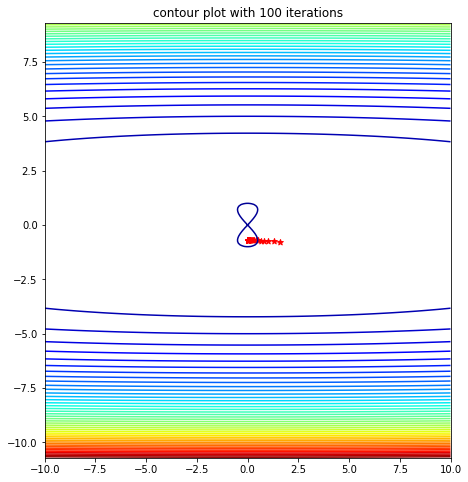

In [ ]:
#function f(w1,w2)=w1**2-w2**2+w2**4 is non-convex function(s) (functions having saddle points at 0 and local minima's)
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=sgd(fu2,fu2_minimzie,learning_rate)
mesh(fu2,iter_x,iter_y,iter_count, w1, w2)
contour(fu2,iter_x,iter_y,iter_count,w1,w2)

Enter initial w1: 2
Enter initial w2: 2
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 16.0, w1 = 2.0, w2 = 2.0
y = 8.0, w1 = 1.7, w2 = 1.7
y = 5.2, w1 = 1.5, w2 = 1.5
y = 3.7, w1 = 1.3, w2 = 1.4
y = 2.7, w1 = 1.2, w2 = 1.3
y = 2.0, w1 = 1.0, w2 = 1.3
y = 1.5, w1 = 0.9, w2 = 1.2
y = 1.1, w1 = 0.8, w2 = 1.1
y = 0.8, w1 = 0.8, w2 = 1.1
y = 0.6, w1 = 0.7, w2 = 1.1
y = 0.4, w1 = 0.6, w2 = 1.0
y = 0.3, w1 = 0.5, w2 = 1.0
y = 0.2, w1 = 0.5, w2 = 1.0
y = 0.1, w1 = 0.4, w2 = 0.9
y = 0.0, w1 = 0.4, w2 = 0.9
y = -0.1, w1 = 0.3, w2 = 0.9
y = -0.1, w1 = 0.3, w2 = 0.9
y = -0.1, w1 = 0.2, w2 = 0.9
y = -0.2, w1 = 0.2, w2 = 0.8
y = -0.2, w1 = 0.2, w2 = 0.8
y = -0.2, w1 = 0.1, w2 = 0.8
y = -0.2, w1 = 0.1, w2 = 0.8
y = -0.2, w1 = 0.1, w2 = 0.8
y = -0.2, w1 = 0.1, w2 = 0.8
y = -0.2, w1 = 0.1, w2 = 0.8
y = -0.2, w1 = 0.0, w2 = 0.8
y = -0.2, w1 = 0.0, w2 = 0.8
y = -0.2, w1 = 0.0, w2 = 0.8
y = -0.2, w1 = 0.0, w2 = 0.7
y = -0.2, w1 = 0.0, w2 = 0.7
y = -0.2, w1 = 0.0, w2 = 0.7
y = -0.2, w1 = 0.0, w2 = 0.

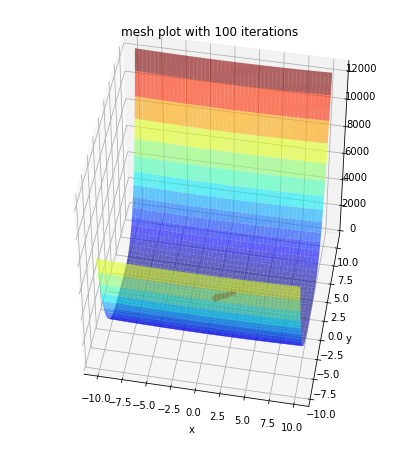

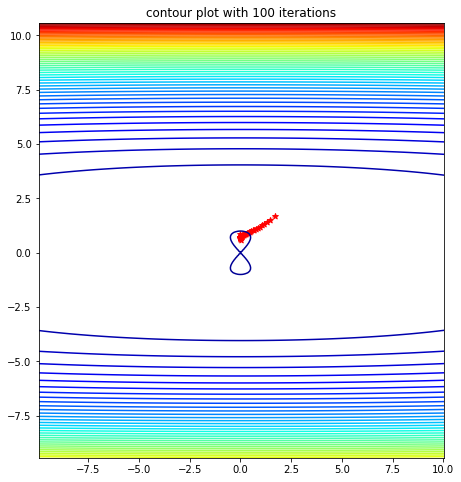

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=RMSprop(fu2,fu2_minimzie,learning_rate)
mesh(fu2,iter_x,iter_y,iter_count, w1, w2)
contour(fu2,iter_x,iter_y,iter_count,w1,w2)

Enter initial w1: 2
Enter initial w2: 2
Enter learning_rate(between 0.1 to 0.001): 0.01
Enter momentum(between 0.1 to 0.001): 0.01
y = 16.0, w1 = 2.0, w2 = 2.0
y = 2.6, w1 = 1.6, w2 = -1.1
y = 1.2, w1 = 1.2, w2 = -0.8
y = 0.6, w1 = 0.9, w2 = -0.7
y = 0.3, w1 = 0.7, w2 = -0.7
y = 0.1, w1 = 0.6, w2 = -0.7
y = -0.1, w1 = 0.4, w2 = -0.7
y = -0.1, w1 = 0.3, w2 = -0.7
y = -0.2, w1 = 0.3, w2 = -0.7
y = -0.2, w1 = 0.2, w2 = -0.7
y = -0.2, w1 = 0.2, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.1, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -0.2, w1 = 0.0, w2 = -0.7
y = -

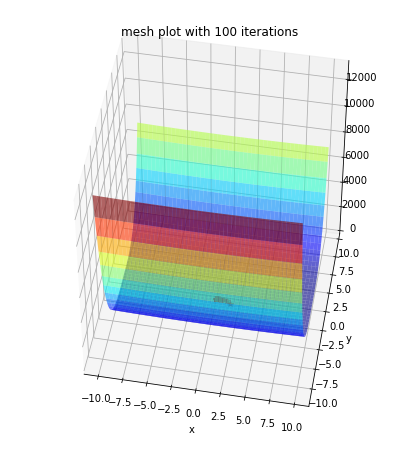

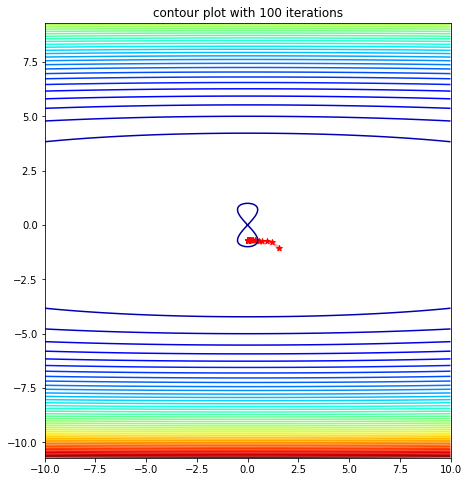

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
momentum=float(input(("Enter momentum(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=NAG(fu2,fu2_minimzie,learning_rate,momentum)
mesh(fu2,iter_x,iter_y,iter_count, w1, w2)
contour(fu2,iter_x,iter_y,iter_count,w1,w2)

Enter initial w1: 2
Enter initial w2: 2
Enter learning_rate(between 0.1 to 0.001): 0.01
y = 16.0, w1 = 2.0, w2 = 2.0
y = 13.0, w1 = 1.9, w2 = 1.9
y = 10.5, w1 = 1.8, w2 = 1.8
y = 8.4, w1 = 1.7, w2 = 1.7
y = 6.7, w1 = 1.6, w2 = 1.6
y = 5.2, w1 = 1.5, w2 = 1.5
y = 4.1, w1 = 1.4, w2 = 1.4
y = 3.1, w1 = 1.3, w2 = 1.3
y = 2.4, w1 = 1.2, w2 = 1.3
y = 1.8, w1 = 1.1, w2 = 1.2
y = 1.3, w1 = 1.0, w2 = 1.1
y = 0.9, w1 = 0.9, w2 = 1.0
y = 0.7, w1 = 0.8, w2 = 1.0
y = 0.4, w1 = 0.8, w2 = 0.9
y = 0.3, w1 = 0.7, w2 = 0.9
y = 0.1, w1 = 0.6, w2 = 0.8
y = 0.0, w1 = 0.5, w2 = 0.8
y = -0.1, w1 = 0.4, w2 = 0.7
y = -0.1, w1 = 0.4, w2 = 0.7
y = -0.2, w1 = 0.3, w2 = 0.6
y = -0.2, w1 = 0.2, w2 = 0.6
y = -0.2, w1 = 0.2, w2 = 0.6
y = -0.2, w1 = 0.1, w2 = 0.6
y = -0.2, w1 = 0.0, w2 = 0.5
y = -0.2, w1 = -0.0, w2 = 0.5
y = -0.2, w1 = -0.0, w2 = 0.5
y = -0.2, w1 = -0.1, w2 = 0.5
y = -0.2, w1 = -0.1, w2 = 0.5
y = -0.1, w1 = -0.2, w2 = 0.5
y = -0.1, w1 = -0.2, w2 = 0.4
y = -0.1, w1 = -0.2, w2 = 0.4
y = -0.1, w1 = -0.2,

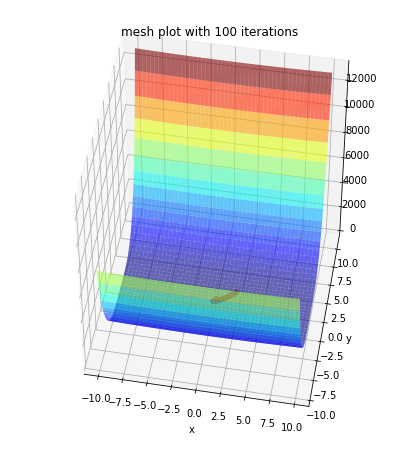

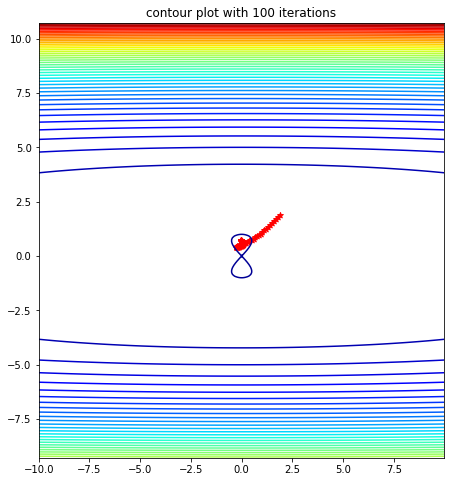

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
iter_x, iter_y,iter_count=ADAM(fu2,fu2_minimzie,learning_rate)
mesh(fu2,iter_x,iter_y,iter_count, w1, w2)
contour(fu2,iter_x,iter_y,iter_count,w1,w2)

Observation: With high learning rate, our optimizer can diverge. With the given set of values, adam performs to reach well (for large iteration) than other optimizer. For small no. of iteration sdg, rmsprop and nag performs well to reach local mimima. At saddle piont, bizzare result can be seen for the given optimizer. Moreover, given function do not have any global maxima.


Q-3 Show the optimization progress on mesh and contour plots

Answer: Yes, mesh and contour plot is shown is previous question


Q-4. Are there any limitations of these algorithms (specifically ADAM)?

Answer: 
Limitation of sgd:it uses a common learning rate for all parameters(so learning rate difficult to choose). For optimization problems with huge number of parameters and it has noisy path.

Limitation of RMSprop: Accumulation of the squared gradients since every added term is positive, the accumulated sum keeps growing causing learning rate to shrink.

Limitation of nasterov accelerated gradient: it does updates each individual parameter to perform larger or smaller updates depending on their importance i.e. it is not adaptive.

Limitation of adam:


*   Despite superior training time, Adam in some areas does not converge to an optimal solution, so for some tasks (such as image classifications) state-of-the-art results are still only achieved by applying SGD with momentum. More than that Wilson et. al [1] showed in their paper ‘The marginal value of adaptive gradient methods in machine learning’ that adaptive methods (such as Adam or Adadelta) do not generalize as well as SGD with momentum when tested on a diverse set of deep learning tasks, discouraging people to use popular optimization algorithms. A lot of research has been done since to analyze the poor generalization of Adam trying to get it to close the gap with SGD.
*   In the paper ‘Improving Generalization Performance by Switching from Adam to SGD’ [2] also showed that by switching to SGD during training training they’ve been able to obtain better generalization power than when using Adam alone. They proposed a simple fix which uses a very simple idea. It was noticed that in earlier stages of training Adam still outperforms SGD but later the learning saturates. They proposed simple strategy which they called SWATS in which they start training deep neural network with Adam but then switch to SGD when certain criteria hits. They managed to achieve results comparable to SGD with momentum.


---
Reference


*   1. https://arxiv.org/search/stat?searchtype=author&query=Roelofs%2C+R
*   2. https://arxiv.org/search/cs?searchtype=author&query=Keskar%2C+N+S






Q-5. What could be the characteristics of a better optimizer to overcome the limitations in Q4 ?

Answer: 


*   It should overfit or underfit the data i.e. test accuracy and validation accuracy should be reasonable. 
*   It should be able to avoid get stuck in local mimina and saddle point.
*   Learning become very slow near saddle point (if dervative of function is very small). So in this case, optimizer should learn to adapt for it






Q-6. Design your own optimizer and compare it with ADAM.

In [ ]:
#Defination of Function used in question 1
def fu(w1, w2): 
  return (w1-1)**2.0+(w2-1)**2

def fu_minimzie():
  return (w1-1)**2.0+(w2-1)**2

#Initial values of parameter w1 and w2 for question 1 and 2
def reset():
  w11=float(input("Enter initial w1: "))
  w22=float(input("Enter initial w2: "))
  w1=tf.Variable(w11)                       #I wanted to type cast to tf.variable. 
  w2=tf.Variable(w22)
  return w1, w2

def RMSprop(w1, w2, func):
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=float(input("Learning rate = "))) #applying the RMSProp optimizer
    epochs = int(input("epochs = "))
    w1_arr, w2_arr = np.zeros(epochs), np.zeros(epochs)
    w = []
    for i in range(epochs):
        with tf.GradientTape() as tape:
            y = func(w1, w2)

        
        grads = tape.gradient(y, [w1, w2])

        w.append(grads)

        if(i>0):
          w[i][0] = (w[i][0]+w[i-1][0])/4
          w[i][1] = (w[i][1]+w[i-1][1])/4
          grads_and_vars = zip(w[i], [w1, w2])
        else:
          grads_and_vars = zip(w[i], [w1, w2])

        print ('f = {:.2f}, w1 = {:.2f}, w2 = {:.2f},  grads0 = {:.2f}, grads1 = {:.2f} '.format(y.numpy(), w1.numpy(), w2.numpy(), grads[0].numpy(), grads[1].numpy()))
 
        optimizer.apply_gradients(grads_and_vars)

def ADAM(fu,fu_minimzie,learning_rate=0.1):
  iter_x, iter_y, iter_count =np.empty(0),np.empty(0), np.empty(0)
  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  for i in range(200):
    print ('y = {:.1f}, w1 = {:.1f}, w2 = {:.1f}'.format(fu(w1, w2).numpy(), w1.numpy(), w2.numpy()))
    opt.minimize(fu_minimzie, var_list=[w1, w2])
 


In [ ]:
w1, w2 = reset()
rmsmodel = RMSprop(w1, w2, fu)

Enter initial w1: 2
Enter initial w2: 2
Learning rate = 0.001
epochs = 200
f = 2.00, w1 = 2.00, w2 = 2.00,  grads0 = 2.00, grads1 = 2.00 
f = 1.99, w1 = 2.00, w2 = 2.00,  grads0 = 1.00, grads1 = 1.00 
f = 1.98, w1 = 2.00, w2 = 2.00,  grads0 = 0.75, grads1 = 0.75 
f = 1.98, w1 = 1.99, w2 = 1.99,  grads0 = 0.68, grads1 = 0.68 
f = 1.97, w1 = 1.99, w2 = 1.99,  grads0 = 0.67, grads1 = 0.67 
f = 1.97, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.97, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.96, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.96, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.95, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.95, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.95, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.94, w1 = 1.99, w2 = 1.99,  grads0 = 0.66, grads1 = 0.66 
f = 1.94, w1 = 1.98, w2 = 1.98,  grads0 = 0.66, grads1 = 0.66 
f = 1.93, w1 = 1.98, w2 = 1.98,  grads0 = 0

In [ ]:
w1, w2 = reset()
learning_rate=float(input(("Enter learning_rate(between 0.1 to 0.001): ")))
ADAM(fu,fu_minimzie,learning_rate)

Enter initial w1: 2
Enter initial w2: 2
Enter learning_rate(between 0.1 to 0.001): 0.001
y = 2.0, w1 = 2.0, w2 = 2.0
y = 1.6, w1 = 1.9, w2 = 1.9
y = 1.3, w1 = 1.8, w2 = 1.8
y = 1.0, w1 = 1.7, w2 = 1.7
y = 0.7, w1 = 1.6, w2 = 1.6
y = 0.5, w1 = 1.5, w2 = 1.5
y = 0.3, w1 = 1.4, w2 = 1.4
y = 0.2, w1 = 1.3, w2 = 1.3
y = 0.1, w1 = 1.2, w2 = 1.2
y = 0.0, w1 = 1.2, w2 = 1.2
y = 0.0, w1 = 1.1, w2 = 1.1
y = 0.0, w1 = 1.0, w2 = 1.0
y = 0.0, w1 = 0.9, w2 = 0.9
y = 0.0, w1 = 0.9, w2 = 0.9
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.7, w2 = 0.7
y = 0.1, w1 = 0.7, w2 = 0.7
y = 0.1, w1 = 0.7, w2 = 0.7
y = 0.1, w1 = 0.7, w2 = 0.7
y = 0.1, w1 = 0.7, w2 = 0.7
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.1, w1 = 0.8, w2 = 0.8
y = 0.0, w1 = 0.8, w2 = 0.8
y = 0.0, w1 = 0.9, w2 = 0.9
y = 0.0, w1 = 0.9, w2 = 0.9
y = 0.0, w1 = 0.9, w2 = 0.9
y = 0.0, w1 = 1.0, w2 = 1.0
y = 0.0, w1 = 1.0, w2 = 1.0
y = 0.0, w1 = 1

Part -2 Convolutional Neural Networks

In [ ]:
import keras
import numpy as np
import tensorflow as tf
import vis
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import cv2
import keras.backend as K
from skimage import io

Q-1 Download the pretrained model (VGG, ResNet, DenseNet, etc.) from the Keras

In [ ]:
#Build A VGG16
vgg16_model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
vgg16_model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Q-2 Modify the final fully connected layer to accomodate 15 classes. 

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
model.summary()
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=15, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Q-3 Finetune the model to classify the given dataset of 15 dog breeds

In [ ]:
#Data preparation
# Organize data into train, valid, test dirs
train_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/val'
test_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler'], batch_size=6, shuffle=False)

Found 1699 images belonging to 15 classes.
Found 483 images belonging to 15 classes.
Found 252 images belonging to 15 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

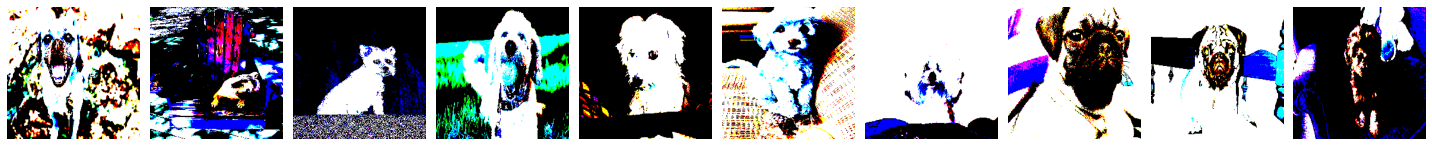

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#Visualize The Data
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
170/170 - 18s - loss: 0.0792 - accuracy: 0.9918 - val_loss: 0.5660 - val_accuracy: 0.8178
Epoch 2/10
170/170 - 18s - loss: 0.0700 - accuracy: 0.9894 - val_loss: 0.5817 - val_accuracy: 0.8178
Epoch 3/10
170/170 - 18s - loss: 0.0625 - accuracy: 0.9929 - val_loss: 0.5812 - val_accuracy: 0.8054
Epoch 4/10
170/170 - 18s - loss: 0.0546 - accuracy: 0.9959 - val_loss: 0.5868 - val_accuracy: 0.8157
Epoch 5/10
170/170 - 18s - loss: 0.0480 - accuracy: 0.9976 - val_loss: 0.5946 - val_accuracy: 0.8157
Epoch 6/10
170/170 - 19s - loss: 0.0430 - accuracy: 0.9971 - val_loss: 0.5918 - val_accuracy: 0.8137
Epoch 7/10
170/170 - 18s - loss: 0.0378 - accuracy: 0.9994 - val_loss: 0.5873 - val_accuracy: 0.8240
Epoch 8/10
170/170 - 18s - loss: 0.0344 - accuracy: 0.9982 - val_loss: 0.6055 - val_accuracy: 0.8137
Epoch 9/10
170/170 - 18s - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.5997 - val_accuracy: 0.8240
Epoch 10/10
170/170 - 18s - loss: 0.0279 - accuracy: 0.9994 - val_loss: 0.6078 - val_accura

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


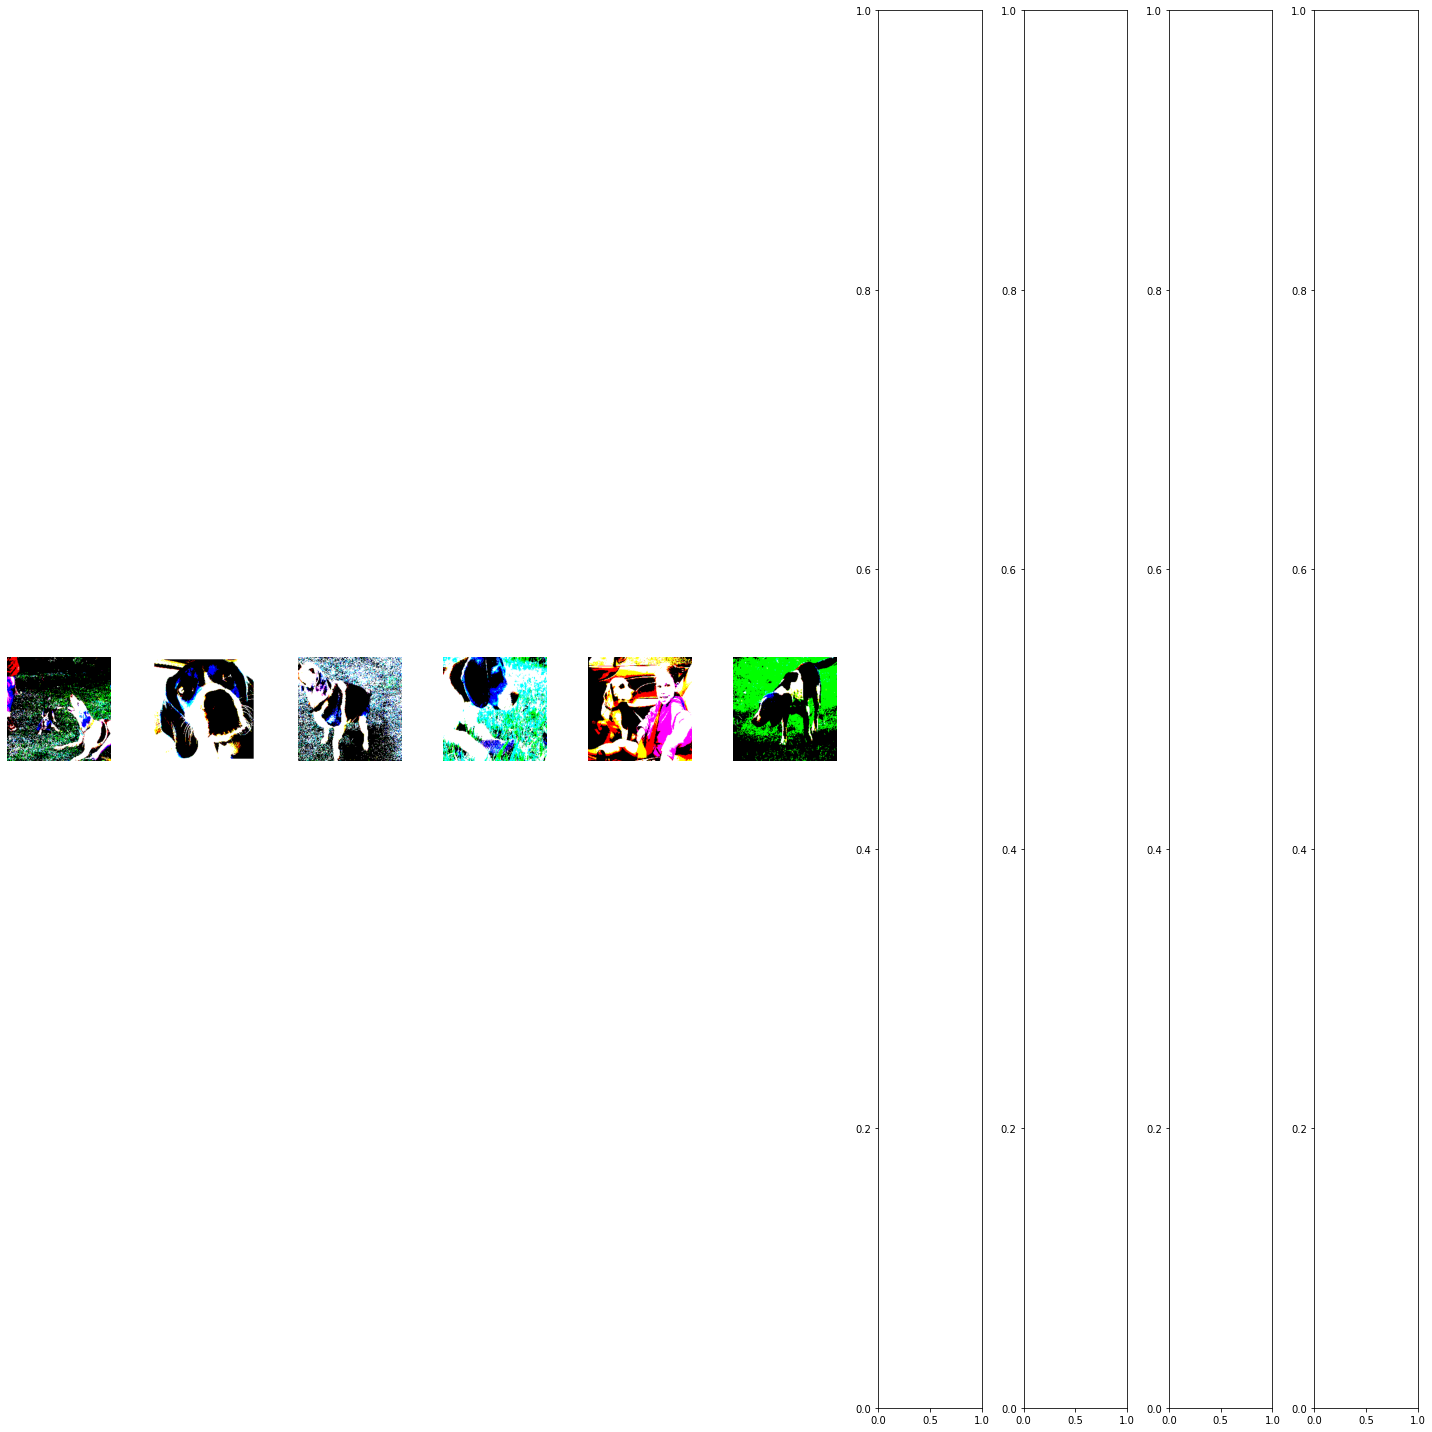

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Confusion matrix, without normalization
[[19  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  2  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  6  0  0  1  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  1  0  1  0  0  1  0]
 [ 0  1  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  1  0  0  7  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  2  0  0 13  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  4  7  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0 17  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1 12  0]

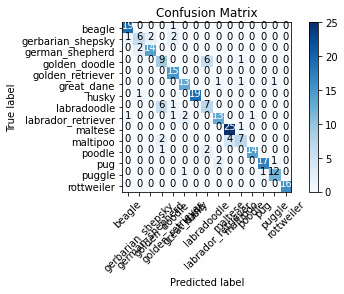

In [ ]:
#Preparing The Test Data
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

#Predict With A Fine-Tuned VGG16 model On The Test Data
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
np.round(predictions)

#Plotting Predictions With A Confusion Matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
test_batches.class_indices
cm_plot_labels = ['beagle', 'gerbarian_shepsky','german_shepherd','golden_doodle','golden_retriever','great_dane','husky','labradoodle','labrador_retriever','maltese','maltipoo','poodle','pug','puggle','rottweiler']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Q-4 Use the validation set to get the optimal hyperparameters so as to achieve high validation accuracy. In case you are adopting any other strategies like Data Augmentation to increase the accuracy, kindly mention the same in the jupyter notebook.

In [ ]:
## Hyper Parameter Optimization

def learnrate(lr):
  print("For learning rate =",lr)
  findmodel = Sequential()
  for layer in vgg16_model.layers[:-1]:
    findmodel.add(layer)
  for layer in model.layers:
    layer.trainable = False
  findmodel.add(Dense(units=15, activation='softmax'))
  findmodel.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
  findmodel.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=10,verbose=2)
  print( )

lrnrate = np.array([0.00001,0.0001, 0.001, 0.01, 0.1,1.0])
for lr in lrnrate:
  learnrate(lr)


For learning rate = 1e-05
Epoch 1/10
170/170 - 18s - loss: 3.5149 - accuracy: 0.1124 - val_loss: 2.9054 - val_accuracy: 0.1863
Epoch 2/10
170/170 - 18s - loss: 2.5397 - accuracy: 0.2525 - val_loss: 2.1826 - val_accuracy: 0.3209
Epoch 3/10
170/170 - 18s - loss: 1.9219 - accuracy: 0.3938 - val_loss: 1.7146 - val_accuracy: 0.4348
Epoch 4/10
170/170 - 18s - loss: 1.5212 - accuracy: 0.4962 - val_loss: 1.4085 - val_accuracy: 0.5342
Epoch 5/10
170/170 - 18s - loss: 1.2562 - accuracy: 0.5851 - val_loss: 1.2007 - val_accuracy: 0.5901
Epoch 6/10
170/170 - 19s - loss: 1.0729 - accuracy: 0.6451 - val_loss: 1.0566 - val_accuracy: 0.6418
Epoch 7/10
170/170 - 18s - loss: 0.9410 - accuracy: 0.6875 - val_loss: 0.9504 - val_accuracy: 0.6853
Epoch 8/10
170/170 - 18s - loss: 0.8408 - accuracy: 0.7222 - val_loss: 0.8738 - val_accuracy: 0.7143
Epoch 9/10
170/170 - 18s - loss: 0.7634 - accuracy: 0.7528 - val_loss: 0.8130 - val_accuracy: 0.7391
Epoch 10/10
170/170 - 18s - loss: 0.6999 - accuracy: 0.7740 - val

So Hyperparmeter opitimation = 0.0001 (manually it can be observed as there is overfitting with reasonal accuracy as compared to others)

Q-7 Implement the Grad-CAM methodolgy by Selvaraju et al.[5] to visualize which regions of the test image is seminal to the classifier's output.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

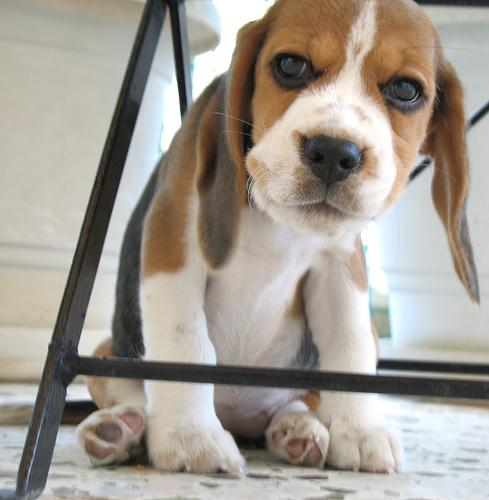

In [ ]:

img_size = (224, 224)
#preprocess_input = keras.applications.xception.preprocess_input
#decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block5_conv3"
classifier_layer_names = [
            "block5_pool",
            "flatten",
            "fc1",
            "fc2",
            "dense",
]

# The local path to our target image
img_path = '/content/drive/My Drive/Colab Notebooks/P29-Cross-Pure-Dogs/test/beagle/beagle.00043.jpg'
display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap



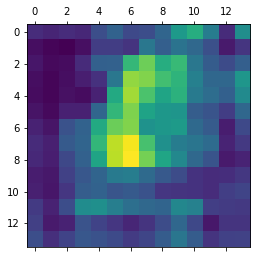

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the top predicted class is
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

Here, after i changed various photos of dog manually, i found heat map(not superimposed image as contrast is less) to be more yellow for face

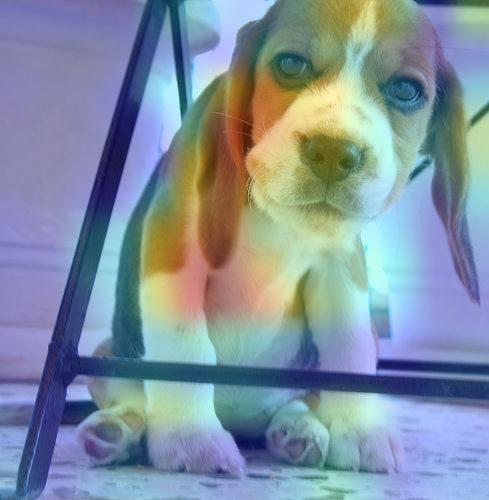

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "dog.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))


Q-8 In Selvaraju et al.[5], a methodology to verify the correctness of the explanations leveraging the ground truth bounding boxes has been proposed. In a dataset as we used in this lab, where such annotations are not available, Can you think of a way to verify the correctness of the explanation generated? (Implementation not needed. Just discuss the methodology you think is suitable to verify the correctness of the generated explanations.)

Answer:

Yes, Correctness of explaination generated can be verified as


1.   We can conduct human studies that show Guided
Grad-CAM explanations are class-discriminative and not
only help humans establish trust, but also help untrained users
successfully discern a ‘stronger’ network from a ‘weaker’
one, even when both make identical predictions.

2.   We can use neuron importance from Grad-CAM and neuron
names from and obtain textual explanations for model
decisions.


3.   We can show a proof-of-concept of how interpretable GradCAM visualizations help in diagnosing failure modes by
uncovering biases in datasets. This is important not just for
generalization, but also for fair and bias-free outcomes as
more and more decisions are made by algorithms in society.




